In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('results/2021-12-31_21.18.54.369319.pickle', 'rb') as f:
    results = pickle.load(f)

In [4]:
import pprint
pp = pprint.PrettyPrinter(indent = 4)

In [7]:
import pandas as pd
import re

In [110]:
idx = pd.IndexSlice

In [11]:
for res in results:
    if re.search('Linear', res['static_kernel'].__name__):
        res['static_kernel'] = 'Linear Kernel'
    else:
        res['static_kernel'] = 'RBF Kernel'
        
    if re.search('lead_lag', res['gen_fct']):
        res['embedding'] = 'Lead-Lag'
    else:
        res['embedding'] = 'Piecewise-Linear'

In [13]:
pp.pprint(results)

[   {   'covs': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
        'dyadic_order': 0,
        'embedding': 'Lead-Lag',
        'gen_fct': 'generate_correlated_gbms_lead_lag',
        'scores': [   tensor(0.0003, dtype=torch.float64),
                      tensor(0.0006, dtype=torch.float64),
                      tensor(0.0035, dtype=torch.float64),
                      tensor(0.0093, dtype=torch.float64),
                      tensor(0.0183, dtype=torch.float64),
                      tensor(0.0310, dtype=torch.float64),
                      tensor(0.0482, dtype=torch.float64),
                      tensor(0.0715, dtype=torch.float64),
                      tensor(0.1030, dtype=torch.float64),
                      tensor(0.1467, dtype=torch.float64)],
        'static_kernel': 'Linear Kernel',
        'variances': [   tensor(5.4682e-09, dtype=torch.float64),
                         tensor(5

In [31]:
res_df = pd.DataFrame(columns = ['score', 'variance'])

In [32]:
# index = gen_fct, static_kernel, dyadic_order, covs
# cols = scores, variances
res_df.index = pd.MultiIndex.from_arrays([[],[],[],[]], names=['embedding', 'static_kernel', 'dyadic_order', 'covariance'])

In [33]:
for res in results:
    for covariance, score, variance in zip(res['covs'], res['scores'], res['variances']):
        res_df.at[(res['embedding'], res['static_kernel'], res['dyadic_order'], float(covariance)), 'score'] = float(score)
        res_df.at[(res['embedding'], res['static_kernel'], res['dyadic_order'], float(covariance)), 'variance'] = float(variance)

In [154]:
res_df.to_csv('hsic_basic_embeddings_and_static_kernels_test.csv')

<AxesSubplot:xlabel='dyadic_order,covariance'>

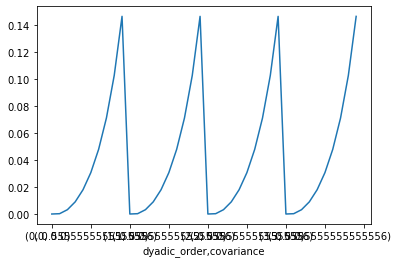

In [36]:
res_df.loc[('Lead-Lag', 'Linear Kernel')]['score'].plot()

<AxesSubplot:xlabel='covariance'>

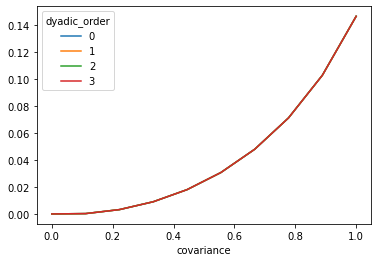

In [48]:
res_df.loc[('Lead-Lag', 'Linear Kernel')]['score'].unstack(level = 0).plot()

<AxesSubplot:xlabel='covariance'>

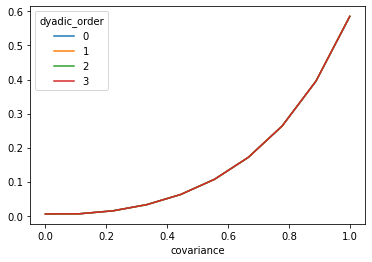

In [49]:
res_df.loc['Lead-Lag', 'RBF Kernel']['score'].unstack(level = 0).plot()

<AxesSubplot:xlabel='covariance'>

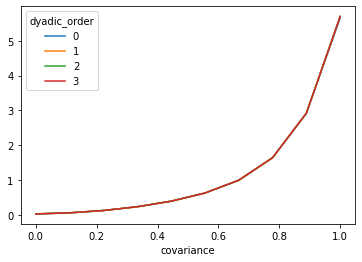

In [50]:
res_df.loc['Piecewise-Linear', 'RBF Kernel']['score'].unstack(level = 0).plot()

<AxesSubplot:xlabel='covariance'>

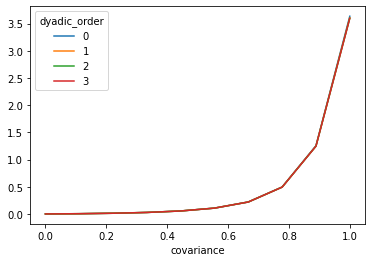

In [51]:
res_df.loc['Piecewise-Linear', 'Linear Kernel']['score'].unstack(level = 0).plot()

Indeed, dyadic order of the solver doesn't seem to change anything in the HSIC score estimate.
Best results (good separation of correlated data) were achieved for RBF Kernel with Piecewise-Linear embedding.

In [111]:
dropped_dyadic = res_df.droplevel('dyadic_order')
dropped_dyadic = dropped_dyadic.loc[~dropped_dyadic.index.duplicated()]

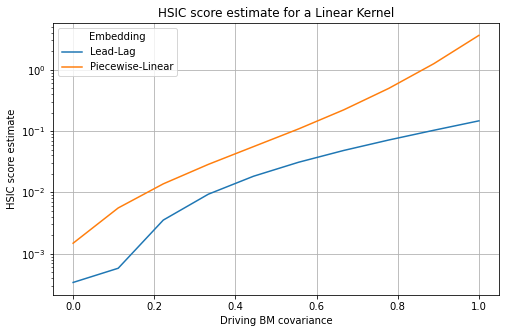

In [159]:
res_for_lin = dropped_dyadic.loc[idx[:, 'Linear Kernel'], idx['score']].droplevel('static_kernel')
ax = res_for_lin.unstack(level=0).plot(figsize = (8, 5))
ax.set_xlabel('Driving BM covariance')
ax.set_ylabel('HSIC score estimate')
ax.set_title('HSIC score estimate for a Linear Kernel')
plt.legend(title = 'Embedding')
ax.set_yscale('log')
ax.grid(which='major')
plt.savefig('results/basic_hsic_test_lin_kernel.png', dpi = 300)

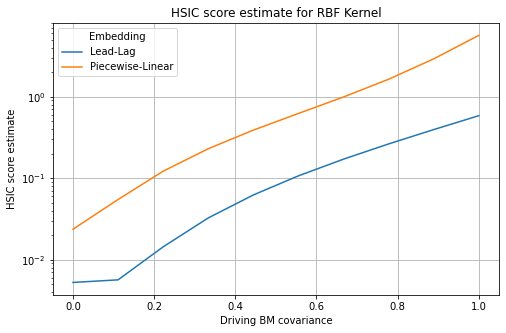

In [160]:
res_for_rbf = dropped_dyadic.loc[idx[:, 'RBF Kernel'], idx['score']].droplevel('static_kernel')
ax = res_for_rbf.unstack(level=0).plot(figsize = (8, 5))
ax.set_xlabel('Driving BM covariance')
ax.set_ylabel('HSIC score estimate')
ax.set_title('HSIC score estimate for RBF Kernel')
plt.legend(title = 'Embedding')
ax.set_yscale('log')
ax.grid(which='major')
plt.savefig('results/basic_hsic_test_rbf_kernel.png', dpi = 300)

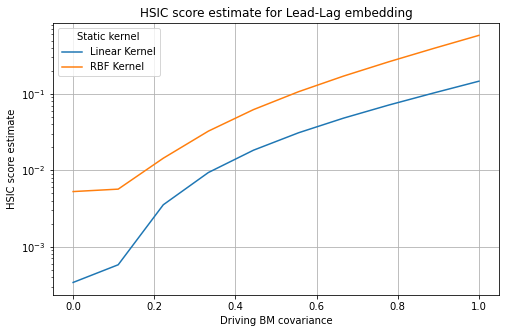

In [161]:
res_for_ll = dropped_dyadic.loc[idx['Lead-Lag', :], idx['score']].droplevel('embedding')
ax = res_for_ll.unstack(level=0).plot(figsize = (8, 5))
ax.set_xlabel('Driving BM covariance')
ax.set_ylabel('HSIC score estimate')
ax.set_title('HSIC score estimate for Lead-Lag embedding')
plt.legend(title = 'Static kernel')
ax.set_yscale('log')
ax.grid(which='major')
plt.savefig('results/basic_hsic_test_ll_embedding.png', dpi = 300)

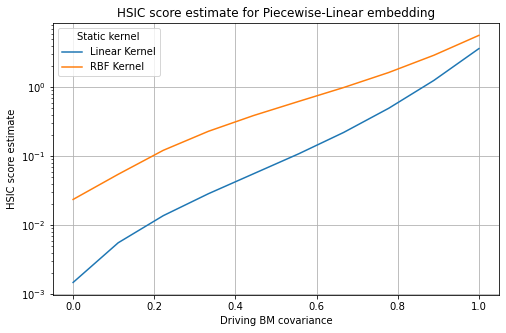

In [162]:
res_for_ll = dropped_dyadic.loc[idx['Piecewise-Linear', :], idx['score']].droplevel('embedding')
ax = res_for_ll.unstack(level=0).plot(figsize = (8, 5))
ax.set_xlabel('Driving BM covariance')
ax.set_ylabel('HSIC score estimate')
ax.set_title('HSIC score estimate for Piecewise-Linear embedding')
plt.legend(title = 'Static kernel')
ax.set_yscale('log')
ax.grid(which='major')
plt.savefig('results/basic_hsic_test_pl_embedding.png', dpi = 300)

In [1]:
francesco_momma_mass = float('inf')